# US Labor Statistics Analysis
We set out to find out some interesting insights about some of the factors that may affect income of workers in the US.
Some key notes about this dataset:
* It surveys employed full time workers
* Count is the number of persons counted in thousands
* Weekly earnings is the median weekly earnings in common US dollars

In [2]:
# Installing the required libraries
!pip install prophet

In [3]:
# Importing the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
%matplotlib inline

In [1]:
# Import the `files` library to allow files upload
from google.colab import files

In [4]:
# Upload "earnings.csv" into Colab, then store in a DataFrame
uploaded = files.upload()

Saving earnings (1).csv to earnings (1).csv


In [5]:
# Storing the data in a Pandas DataFrame
# Setting the "Year" column as the Datetime Index.

df_labor_stats_raw = pd.read_csv(
    "earnings (1).csv",
    index_col='Year',
    parse_dates=True
)

#Removing unwanted columns
df_labor_stats = df_labor_stats_raw[["Gender", "Race", "Level of Education", "Count", "Weekly Earnings"]]

#Review the first and last five rows of the DataFrame
display(df_labor_stats.head())
display(df_labor_stats.tail())

,Gender,Race,Level of Education,Count,Weekly Earnings
Year,,,,,
2000-01-01,All,ALL,ALL,101210.0,NaN
2000-01-01,All,ALL,ALL,NaN,576.0
2000-01-01,Male,ALL,ALL,57107.0,NaN
2000-01-01,Male,ALL,ALL,NaN,641.0
2000-01-01,Female,ALL,ALL,44103.0,NaN


,Gender,Race,Level of Education,Count,Weekly Earnings
Year,,,,,
2023-01-01,Female,ALL,Bachelor's degree or higher,NaN,1437.0
2023-01-01,Female,ALL,Bachelor's degree only,14768.0,NaN
2023-01-01,Female,ALL,Bachelor's degree only,NaN,1318.0
2023-01-01,Female,ALL,Advanced degree,10242.0,NaN
2023-01-01,Female,ALL,Advanced degree,NaN,1603.0


In [6]:
#Creating a Weekly Earnings only dataframe
all_weekly_earnings = df_labor_stats[["Gender", "Race", "Level of Education", "Weekly Earnings"]].dropna()
all_weekly_earnings.head()

,Gender,Race,Level of Education,Weekly Earnings
Year,,,,
2000-01-01,All,ALL,ALL,576.0
2000-01-01,Male,ALL,ALL,641.0
2000-01-01,Female,ALL,ALL,493.0
2000-01-01,All,White,ALL,590.0
2000-01-01,Male,White,ALL,662.0


In [7]:
all_weekly_earnings["Level of Education"].unique()

array(['ALL', 'Less than a high school diploma', 'High school graduates',
       'Some college or associate degree', "Bachelor's degree or higher",
       "Bachelor's degree only", 'Advanced degree'], dtype=object)

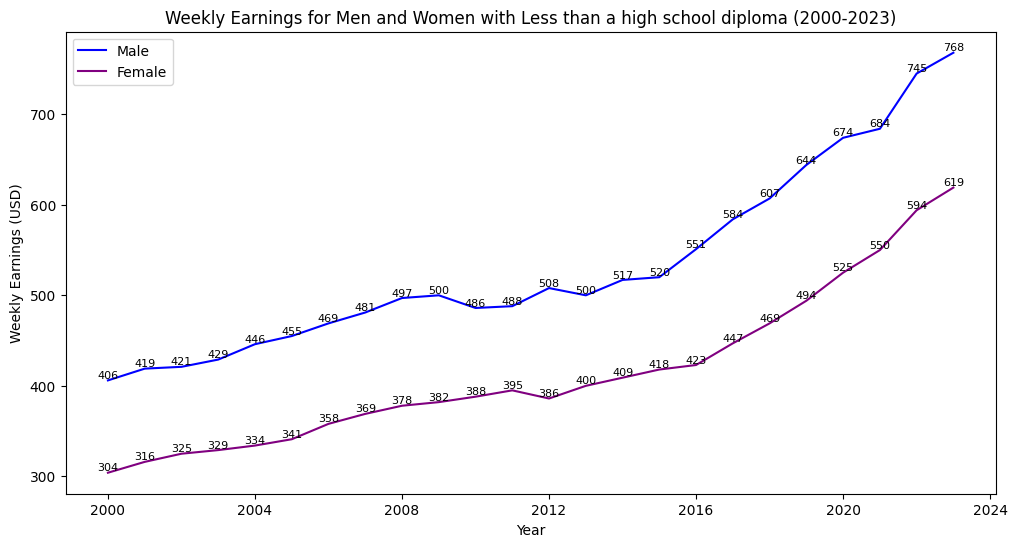

In [23]:
# Creating the graphing weekly earnings function for different education levels
def graph_median_earnings(all_weekly_earnings, education):
# Plotting Weekly Earnings for Men and Women with Less than a High School Diploma 2000-2023
  plt.figure(figsize=(12, 6))

# Plotting Men's Weekly Earnings
  men_weekly_earnings = all_weekly_earnings.loc[(all_weekly_earnings['Gender'] == 'Male') & (all_weekly_earnings['Level of Education'] == education)]
  plt.plot(men_weekly_earnings.index, men_weekly_earnings['Weekly Earnings'], color='blue', label='Male')

# Add labels to each point
  for i, txt in enumerate(men_weekly_earnings['Weekly Earnings']):
    plt.text(men_weekly_earnings.index[i], men_weekly_earnings['Weekly Earnings'][i], f"{int(men_weekly_earnings['Weekly Earnings'][i])}", fontsize=8, ha='center', va='bottom')

# Plotting Women's Weekly Earnings
  women_weekly_earnings = all_weekly_earnings.loc[(all_weekly_earnings['Gender'] == 'Female') & (all_weekly_earnings['Level of Education'] == education)]
  plt.plot(women_weekly_earnings.index, women_weekly_earnings['Weekly Earnings'], color='purple', label='Female')

# Add labels to each point
  for i, txt in enumerate(women_weekly_earnings['Weekly Earnings']):
    plt.text(women_weekly_earnings.index[i], women_weekly_earnings['Weekly Earnings'][i], f"{int(women_weekly_earnings['Weekly Earnings'][i])}", fontsize=8, ha='center', va='bottom')

# Adding labels and title
  plt.title(f'Weekly Earnings for Men and Women with {education} (2000-2023)')
  plt.xlabel('Year')
  plt.ylabel('Weekly Earnings (USD)')
  plt.legend()

# Display the plot
  plt.show()

graph_median_earnings(all_weekly_earnings, "Less than a high school diploma")

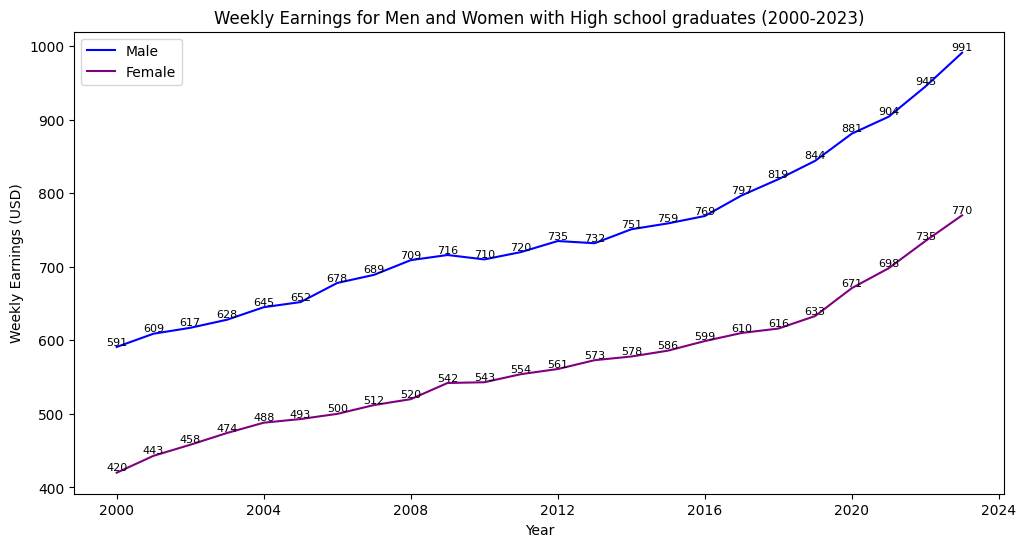

In [26]:
graph_median_earnings(all_weekly_earnings, "High school graduates")

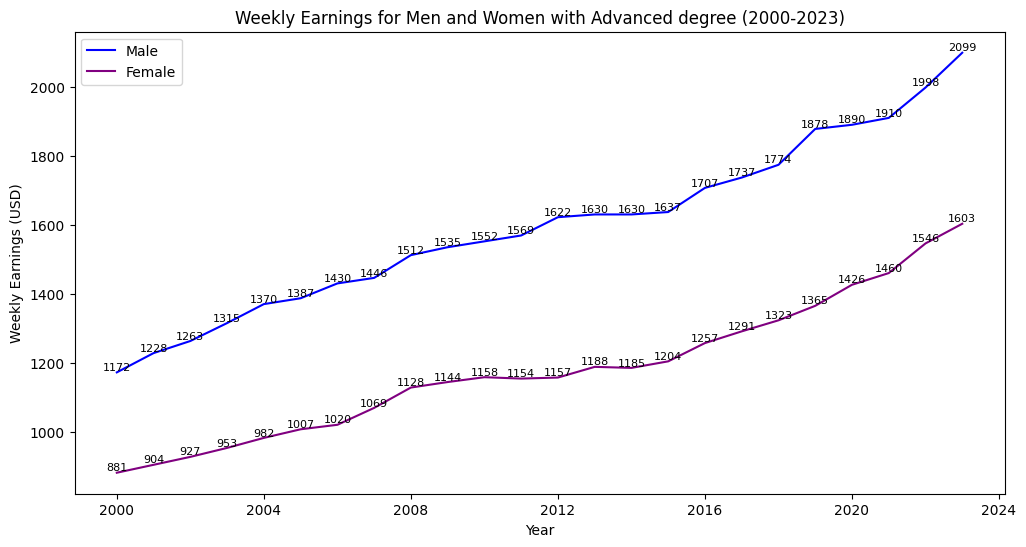

In [25]:
graph_median_earnings(all_weekly_earnings, "Advanced degree")

In [ ]:
# Analyze trends across all education levels by degree or level of education, ethnicity, and sex
education_trends = df_labor_stats.groupby(['Level of Education', 'Race', 'Gender']).mean()

# Compare trends to levels of income to identify correlations and insights
income_education_correlation = education_trends.corr()
plt.show()

# Making Future Predictions with Prophet
We set out to predict what men and women will be earning weekly for the next 10 years based on our dataset.

We first start with the men.

In [ ]:
#Isolate men_weekly_earnings to two columns for Prophet model
future_men_weekly_earnings = men_weekly_earnings[["Weekly Earnings"]]
future_men_weekly_earnings.head()

,Weekly Earnings
Year,
2000-01-01,641.0
2000-01-01,662.0
2000-01-01,510.0
2000-01-01,685.0
2000-01-01,417.0


In [ ]:
# Reset the index so that we recode the columns for Prophet
new_men_weekly_earnings = future_men_weekly_earnings.reset_index()
new_men_weekly_earnings.head()

,Year,Weekly Earnings
0,2000-01-01,641.0
1,2000-01-01,662.0
2,2000-01-01,510.0
3,2000-01-01,685.0
4,2000-01-01,417.0


In [ ]:
# Label the columns ds and y so that the syntax is recognized by Prophet
new_men_weekly_earnings.columns = ['ds', 'y']
new_men_weekly_earnings.head()

,ds,y
0,2000-01-01,641.0
1,2000-01-01,662.0
2,2000-01-01,510.0
3,2000-01-01,685.0
4,2000-01-01,417.0


In [ ]:
# Call the Prophet function, store as an object
m = Prophet()
m

In [ ]:
# Fit the Prophet model to our dataframe
m.fit(new_men_weekly_earnings)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6i11ivw0/0q_qc8wq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6i11ivw0/0x_qheut.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46173', 'data', 'file=/tmp/tmp6i11ivw0/0q_qc8wq.json', 'init=/tmp/tmp6i11ivw0/0x_qheut.json', 'output', 'file=/tmp/tmp6i11ivw0/prophet_model8vuosbep/prophet_model-20240510015857.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:58:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:58:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 10 years
future = m.make_future_dataframe(periods=10, freq='Y')

# View the first and last ten rows of the predictions
display(future.head(10))
display(future.tail(10))

,ds
0,2000-01-01
1,2001-01-01
2,2002-01-01
3,2003-01-01
4,2004-01-01
5,2005-01-01
6,2006-01-01
7,2007-01-01
8,2008-01-01
9,2009-01-01


,ds
24,2023-12-31
25,2024-12-31
26,2025-12-31
27,2026-12-31
28,2027-12-31
29,2028-12-31
30,2029-12-31
31,2030-12-31
32,2031-12-31
33,2032-12-31


In [ ]:
# Make a forecast based on the future DataFrame
forecast = m.predict(future)

# Review the first five rows of the forecast DataFrame
display(forecast.head())
display(forecast.tail())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-01-01,634.376730,361.822053,793.347866,634.376730,634.376730,-55.360590,-55.360590,-55.360590,-55.360590,-55.360590,-55.360590,0.0,0.0,0.0,579.016140
1,2001-01-01,657.154490,380.484534,817.032463,657.154490,657.154490,-64.957073,-64.957073,-64.957073,-64.957073,-64.957073,-64.957073,0.0,0.0,0.0,592.197417
2,2002-01-01,679.870016,402.649051,851.773646,679.870016,679.870016,-61.802084,-61.802084,-61.802084,-61.802084,-61.802084,-61.802084,0.0,0.0,0.0,618.067931
3,2003-01-01,702.585542,448.500378,867.993961,702.585542,702.585542,-58.601959,-58.601959,-58.601959,-58.601959,-58.601959,-58.601959,0.0,0.0,0.0,643.983583
4,2004-01-01,725.301068,461.217114,873.759008,725.301068,725.301068,-55.360590,-55.360590,-55.360590,-55.360590,-55.360590,-55.360590,0.0,0.0,0.0,669.940478


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
29,2028-12-31,1307.253692,1050.429523,1474.221078,1306.715284,1307.799219,-52.081922,-52.081922,-52.081922,-52.081922,-52.081922,-52.081922,0.0,0.0,0.0,1255.171770
30,2029-12-31,1330.886422,1066.268490,1497.224798,1330.191818,1331.553405,-48.769942,-48.769942,-48.769942,-48.769942,-48.769942,-48.769942,0.0,0.0,0.0,1282.116480
31,2030-12-31,1354.519151,1090.130004,1521.523297,1353.647638,1355.354512,-45.428676,-45.428676,-45.428676,-45.428676,-45.428676,-45.428676,0.0,0.0,0.0,1309.090475
32,2031-12-31,1378.151880,1119.227500,1542.625405,1377.108666,1379.161703,-42.062184,-42.062184,-42.062184,-42.062184,-42.062184,-42.062184,0.0,0.0,0.0,1336.089697
33,2032-12-31,1401.849357,1137.047378,1568.108579,1400.594243,1403.020522,-52.081922,-52.081922,-52.081922,-52.081922,-52.081922,-52.081922,0.0,0.0,0.0,1349.767435


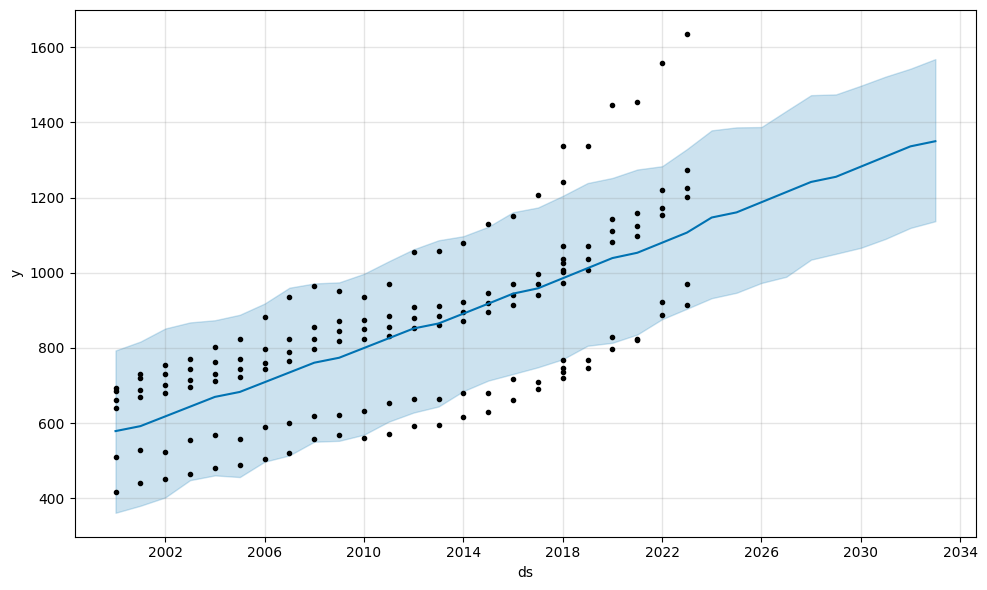

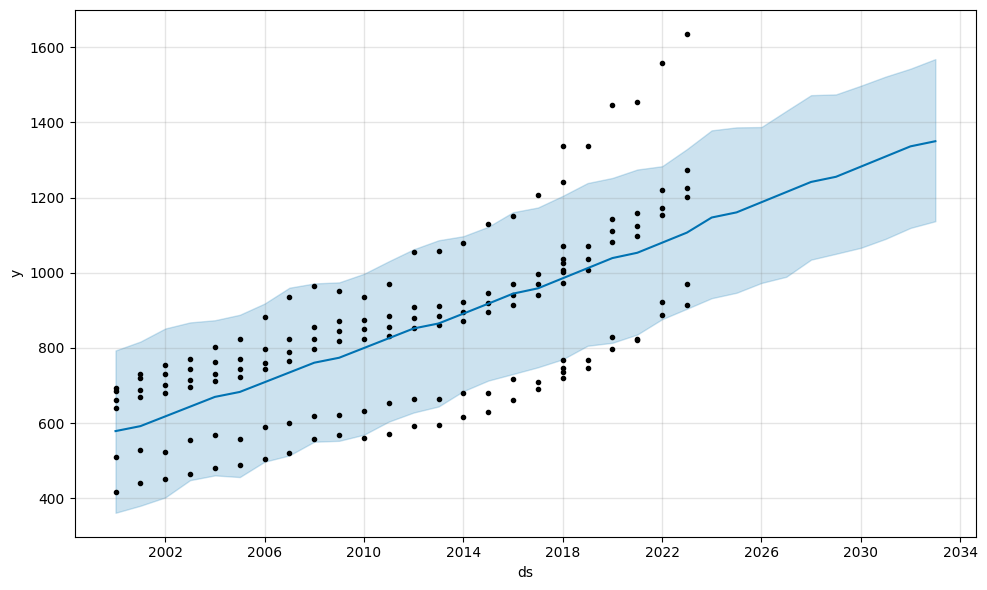

In [ ]:
# Plot the Prophet predictions for the men's weekly earnings
m.plot(forecast)

Now we make predictions for the women.

In [ ]:
#Isolate women_weekly_earnings to two columns for Prophet model
future_women_weekly_earnings = women_weekly_earnings[["Weekly Earnings"]]
future_women_weekly_earnings.head()

,Weekly Earnings
Year,
2000-01-01,493.0
2000-01-01,502.0
2000-01-01,429.0
2000-01-01,547.0
2000-01-01,366.0


In [ ]:
# Reset the index so that we recode the columns for Prophet
new_women_weekly_earnings = future_women_weekly_earnings.reset_index()
new_women_weekly_earnings.head()

,Year,Weekly Earnings
0,2000-01-01,493.0
1,2000-01-01,502.0
2,2000-01-01,429.0
3,2000-01-01,547.0
4,2000-01-01,366.0


In [ ]:
# Label the columns ds and y so that the syntax is recognized by Prophet
new_women_weekly_earnings.columns = ['ds', 'y']
new_women_weekly_earnings.head()

,ds,y
0,2000-01-01,493.0
1,2000-01-01,502.0
2,2000-01-01,429.0
3,2000-01-01,547.0
4,2000-01-01,366.0


In [ ]:
# Call the Prophet function, store as an object
fm = Prophet()
fm

In [ ]:
# Fit the Prophet model to our dataframe
fm.fit(new_women_weekly_earnings)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp10fge2ll/gxkqncea.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp10fge2ll/q3o4xu05.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1807', 'data', 'file=/tmp/tmp10fge2ll/gxkqncea.json', 'init=/tmp/tmp10fge2ll/q3o4xu05.json', 'output', 'file=/tmp/tmp10fge2ll/prophet_modelgdv2fdi4/prophet_model-20240513210411.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:04:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:04:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 10 years
fem_future = fm.make_future_dataframe(periods=10, freq='Y')

# View the first and last ten rows of the predictions
display(fem_future.head(10))
display(fem_future.tail(10))

,ds
0,2000-01-01
1,2001-01-01
2,2002-01-01
3,2003-01-01
4,2004-01-01
5,2005-01-01
6,2006-01-01
7,2007-01-01
8,2008-01-01
9,2009-01-01


,ds
24,2023-12-31
25,2024-12-31
26,2025-12-31
27,2026-12-31
28,2027-12-31
29,2028-12-31
30,2029-12-31
31,2030-12-31
32,2031-12-31
33,2032-12-31


In [ ]:
# Make a forecast based on the future DataFrame
fem_forecast = fm.predict(fem_future)

# Review the first five rows of the forecast DataFrame
display(fem_forecast.head())
display(fem_forecast.tail())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-01-01,490.290663,338.915388,601.466250,490.290663,490.290663,-18.848823,-18.848823,-18.848823,-18.848823,-18.848823,-18.848823,0.0,0.0,0.0,471.441840
1,2001-01-01,508.512728,356.709431,615.028610,508.512728,508.512728,-24.035510,-24.035510,-24.035510,-24.035510,-24.035510,-24.035510,0.0,0.0,0.0,484.477218
2,2002-01-01,526.685005,371.300294,631.615442,526.685005,526.685005,-22.322224,-22.322224,-22.322224,-22.322224,-22.322224,-22.322224,0.0,0.0,0.0,504.362782
3,2003-01-01,544.857283,396.334735,656.636272,544.857283,544.857283,-20.592627,-20.592627,-20.592627,-20.592627,-20.592627,-20.592627,0.0,0.0,0.0,524.264656
4,2004-01-01,563.029561,421.510997,674.364273,563.029561,563.029561,-18.848823,-18.848823,-18.848823,-18.848823,-18.848823,-18.848823,0.0,0.0,0.0,544.180737


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
29,2028-12-31,1117.184130,965.866604,1226.882862,1112.976869,1121.601147,-17.092935,-17.092935,-17.092935,-17.092935,-17.092935,-17.092935,0.0,0.0,0.0,1100.091195
30,2029-12-31,1142.427243,998.486244,1260.785224,1136.897054,1147.995900,-15.327098,-15.327098,-15.327098,-15.327098,-15.327098,-15.327098,0.0,0.0,0.0,1127.100144
31,2030-12-31,1167.670355,1028.823560,1284.901191,1160.858736,1174.300469,-13.553458,-13.553458,-13.553458,-13.553458,-13.553458,-13.553458,0.0,0.0,0.0,1154.116897
32,2031-12-31,1192.913467,1050.778339,1299.619171,1184.883333,1200.858650,-11.774170,-11.774170,-11.774170,-11.774170,-11.774170,-11.774170,0.0,0.0,0.0,1181.139297
33,2032-12-31,1218.225739,1070.340289,1337.535592,1208.595192,1227.559075,-17.092935,-17.092935,-17.092935,-17.092935,-17.092935,-17.092935,0.0,0.0,0.0,1201.132803


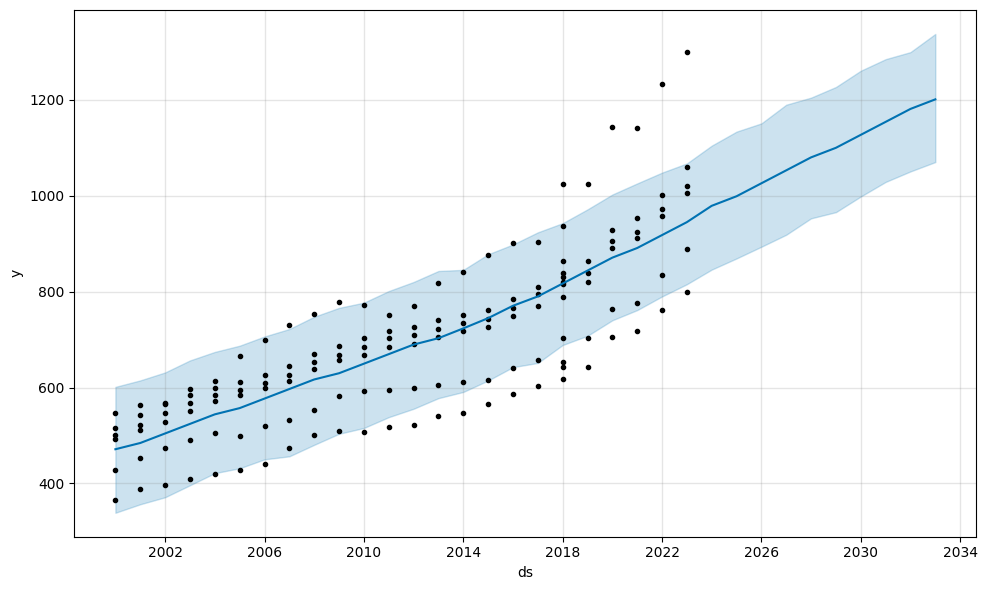

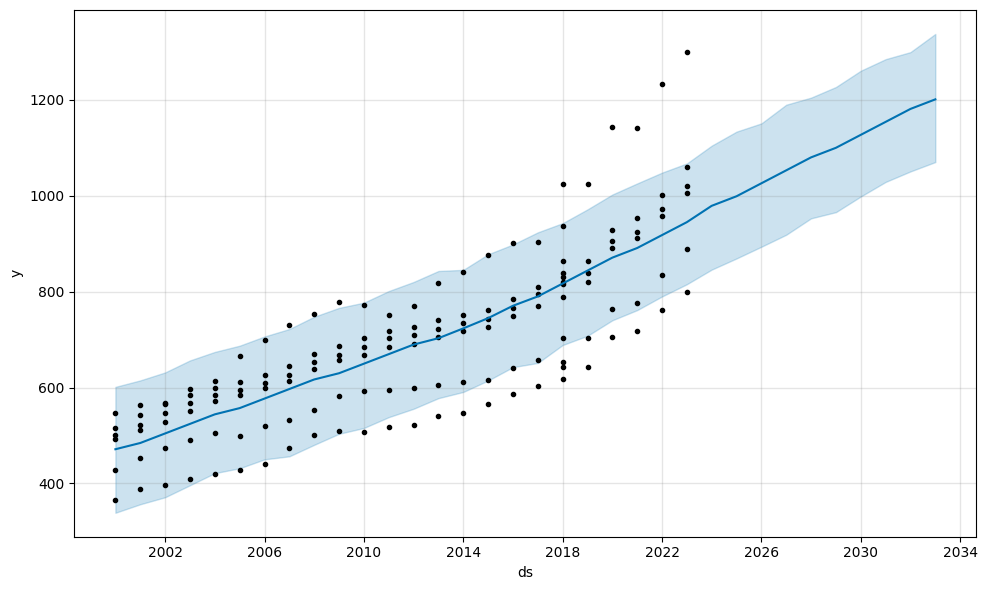

In [ ]:
# Plot the Prophet predictions for the men's weekly earnings
fm.plot(fem_forecast)